Bayesian Networks (10 points)
*** This question is to be solved by hand ***

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:




1)  Which of the following conditional independence relationships hold?  Choose “Independent” or “Dependent” for each (4 points):

CI (Shipper Name, Value | F Port)?			Dependent
CI (Shipper Name, Value | Shipping Line)? 		Independent
CI (Foreign Port, Commodity | Country)?		Independent
CI (Foreign Port, Commodity | County, Weight)?	Dependent


2)  Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)
Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)
Foreign Port | Shipping Line = ASCO: Vancouver (100%)
US Port | Shipping Line = ASCO: Seattle (100%)
US Port | Shipping Line = CSCO: Seattle (10%), Los Angeles (90%)
Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%) 
Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)
Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Which of the following packages is most anomalous?  

a) A heavy package shipped from Vancouver to Seattle by ASCO	
b) A heavy package shipped from Vancouver to Seattle by CSCO	
c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous).  You must show your calculations to receive credit.  (6 points)

a) Pr = (0.3)(1)(1)(0.2) = .06
b) Pr = (0.7)(0.6)(0.1)(0.15) = .0063
c) Pr = (0.7)(0.4)(0.9)(0.6) = .1512

So package b is most anomalous given the Bayesian Network.


Q2

In [1]:
import pandas as pd
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy as hac
from collections import Counter
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cross_validation import train_test_split
from sklearn import mixture
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator,BayesianEstimator


%matplotlib inline
data2=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q2.csv")
from sklearn.cross_validation import train_test_split
train,test=train_test_split(data2,random_state=9,test_size=0.4)

/home/lingjing/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#a) Use the training data to select the best structure you want to use for Bayesian Network Learning. 
#Please use Hill Climbing with BIC score metric. (10pts)

hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = hc.estimate()
print "Structure: ",(best_model.edges())

#b) Use Bayesian Estimator to estimate the CPDs for your model and visulize the network with CPDs. (15pts)   

# Defining the model
model = BayesianModel(best_model.edges())

# Learing CPDs using Bayesian Estimators
model.fit(train, estimator=BayesianEstimator)
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
print model.get_independencies()

Structure:  [('A', 'C'), ('A', 'B'), ('A', 'D'), ('H', 'A'), ('H', 'G')]
CPD of A:
+------+------------------+--------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-----------------+-----------------+
| H    | H(0)             | H(1)   | H(2)             | H(3)              | H(4)              | H(5)              | H(6)              | H(7)              | H(8)              | H(9)             | H(10)             | H(11)           | H(12)           |
+------+------------------+--------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-----------------+-----------------+
| A(0) | 0.921052631579   | 0.2625 | 0.248414376321   | 0.0197172619048   | 0.000247524752475 | 0.000138657792568 | 0.000132450331126 | 0.000140686550366 | 0.000187

In [3]:
#c) Use the model to predict "A" using the testing dataset. Report the OS prediction accuracy. (10pts)

test.index=range(len(test))
predict_data = test.copy()
predict_data.drop('A', axis=1, inplace=True)
predict_data.drop('E', axis=1, inplace=True)
predict_data.drop('F', axis=1, inplace=True)

y_pred = model.predict(predict_data)
print (y_pred["A"]==test.A).sum()*1.0/len(test)

0.487


# Q3. 

In [4]:
data3 = pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q3.csv")
data4 = pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q3_2.csv")

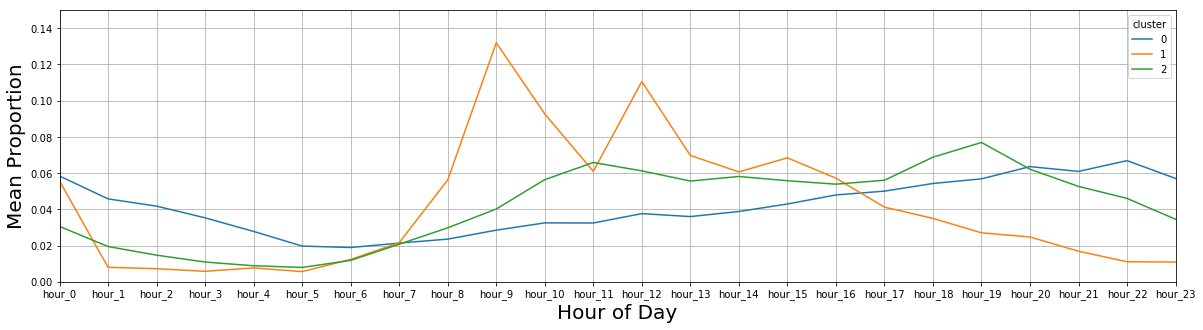

In [5]:
#a)
## columns 9:33 in data3 is hour_0 .. hour_23
X3_hour = data3.iloc[:,9:33]

km = KMeans(random_state=324, n_clusters=3)
label3_hour = km.fit(X3_hour).labels_

res3_hour = X3_hour.copy()
res3_hour['cluster'] = label3_hour
plot3_hour = res3_hour.groupby('cluster').mean().transpose()
plot3_hour

fig, ax = plt.subplots(figsize=(20,5))
plot3_hour.plot(ax=ax, grid=True, xticks=range(24), ylim=(0,0.15))
ax.set_xlabel('Hour of Day', fontsize=20)
ax.set_ylabel('Mean Proportion', fontsize=20)
plt.show()

b)

Cluster 0 describes 30% of crimes; its rates are highest during the work day and low at night.  

Cluster 1 describes 52% of crimes; its rates are relatively flat over the course of the day, but highest at night and lowest in the mornings.

Cluster 2 (describing 18% of crimes) is sharply peaked at dinnertime with a smaller peak at lunchtime.

C)

In [6]:
from collections import Counter
data3['label'] = label3_hour
list_crime = data3['crime_type'][data3['label']==0].apply(lambda x: x.split(":")[0])
print Counter(list_crime)

Counter({'BATTERY': 10, 'ROBBERY': 9, 'CRIMINAL DAMAGE': 5, 'ASSAULT': 4, 'WEAPONS VIOLATION': 3, 'NARCOTICS': 3, 'MOTOR VEHICLE THEFT': 3, 'CRIM SEXUAL ASSAULT': 2, 'BURGLARY': 2, 'SEX OFFENSE': 2, 'HOMICIDE': 1, 'DECEPTIVE PRACTICE': 1, 'ARSON': 1, 'LIQUOR LAW VIOLATION': 1, 'STALKING': 1, 'CRIMINAL TRESPASS': 1, 'INTERFERENCE WITH PUBLIC OFFICER': 1, 'OTHER OFFENSE': 1, 'OFFENSE INVOLVING CHILDREN': 1, 'PROSTITUTION': 1})


In [7]:
list_crime = data3['crime_type'][data3['label']==1].apply(lambda x: x.split(":")[0])
print Counter(list_crime)


Counter({'DECEPTIVE PRACTICE': 8, 'OTHER OFFENSE': 2, 'BATTERY': 1, 'ASSAULT': 1, 'PUBLIC PEACE VIOLATION': 1})


In [8]:
list_crime = data3['crime_type'][data3['label']==2].apply(lambda x: x.split(":")[0])
print Counter(list_crime)

Counter({'OTHER OFFENSE': 14, 'NARCOTICS': 12, 'THEFT': 7, 'DECEPTIVE PRACTICE': 3, 'CRIMINAL TRESPASS': 3, 'OFFENSE INVOLVING CHILDREN': 3, 'BATTERY': 2, 'ASSAULT': 2, 'BURGLARY': 2, 'WEAPONS VIOLATION': 1, 'PUBLIC PEACE VIOLATION': 1, 'INTERFERENCE WITH PUBLIC OFFICER': 1, 'SEX OFFENSE': 1, 'GAMBLING': 1})


In [9]:
#Battery and robbery are mainly in the first cluster
#deceptive practice is mainly in the second cluster
#narotics and other office are mainly in the third cluster

D)

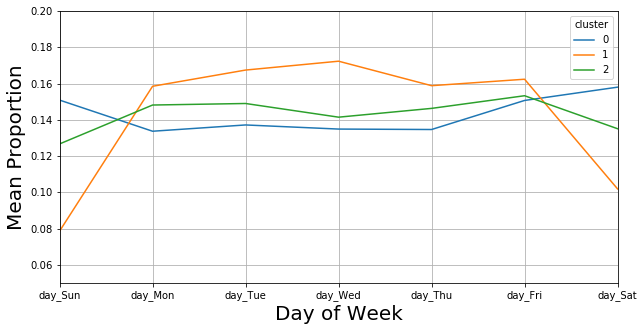

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

## columns 2:9 in data3 is day_Sun .. day_Sat
res3_day = data3.iloc[:,2:9]
res3_day['cluster'] = label3_hour
res3_day.groupby('cluster').mean().transpose().plot(ax=ax, grid=True, xticks=range(7), ylim=(0.05,0.2))
ax.set_xlabel('Day of Week', fontsize=20)
ax.set_ylabel('Mean Proportion', fontsize=20)
plt.show()

e)

Not included. 

f)


In [11]:
### f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes?

## FBI’s division in cluster 1
print data3.iloc[label3_hour == 1, 1].value_counts()

## FBI’s division in cluster 2
print data3.iloc[label3_hour == 2, 1].value_counts()

## FBI’s division in cluster 0
print data3.iloc[label3_hour == 0, 1].value_counts()

P2    13
Name: Category, dtype: int64
P2     42
P1P     9
P1V     2
Name: Category, dtype: int64
P2     25
P1V    22
P1P     6
Name: Category, dtype: int64


[('P2', 29), ('P1V', 22), ('P1P', 6)]
[('P2', 10)]
[('P2', 41), ('P1P', 9), ('P1V', 2)]

In [12]:
hours = filter(lambda col: 'hour' in col, data3.columns)
data3hours = data3[hours]
data3hours.head(3)
# Cluster the data with K means into 3 clusters
km=KMeans(random_state = 908, n_clusters = 3)
kmeansclusters = km.fit(data3hours)
print "K means \n", kmeansclusters.labels_
# Cluster the data with K means into 3 clusters
km=KMeans(random_state = 908, n_clusters = 3)
kmeansclusters = km.fit(data3hours)
print "K means \n", kmeansclusters.labels_
meanscluster = pd.DataFrame(kmeansclusters.cluster_centers_.transpose(), columns = ['cluster0', 'cluster1', 'cluster2'])

FBIdiv = data3[['Category']]
FBIdiv['cluster'] = kmeansclusters.labels_

FBIdiv.head(3)

grouped = FBIdiv.groupby(['cluster']).aggregate(lambda x: tuple(x))
grouped = grouped.reset_index()

grouped

# Cluster 0
print sorted(zip(Counter(grouped.iloc[0]['Category']).keys(), Counter(grouped.iloc[0]['Category']).values()), 
             key = lambda x: x[1], reverse = True)

# Cluster 1
print sorted(zip(Counter(grouped.iloc[1]['Category']).keys(), Counter(grouped.iloc[1]['Category']).values()), 
             key = lambda x: x[1], reverse = True)

# Cluster 2
print sorted(zip(Counter(grouped.iloc[2]['Category']).keys(), Counter(grouped.iloc[2]['Category']).values()), 
             key = lambda x: x[1], reverse = True)

K means 
[0 0 0 2 0 0 1 2 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 0 1
 1 1 2 2 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 0 2 0 1 2 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2
 2 2 2 2 0 0 0 2]
K means 
[0 0 0 2 0 0 1 2 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 0 1
 1 1 2 2 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 0 2 0 1 2 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2
 2 2 2 2 0 0 0 2]
[('P2', 29), ('P1V', 22), ('P1P', 6)]
[('P2', 10)]
[('P2', 41), ('P1P', 9), ('P1V', 2)]


/home/lingjing/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


g)

In [13]:
import numpy as np
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pgmpy.estimators import BicScore, HillClimbSearch, BayesianEstimator
from pgmpy.models import BayesianModel
from IPython.display import Image, display
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
## columns 2:9 in data3 is day_Sun .. day_Sat
X3_day = data3.iloc[:,2:9]
range_n_clusters = range(2,9)

#### Kmeans

for n_clusters in range_n_clusters:
    silhouette = []
    for i in range(100):
        km = KMeans(random_state=i*i, n_clusters=n_clusters)
        cluster_labels = km.fit(X3_day).labels_
        silhouette.append(silhouette_score(X3_day, cluster_labels))
    silhouette_avg = np.mean(silhouette)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

# Choose n_clusters = 5 or 2

km_g_n = 5
km_g = KMeans(random_state=123, n_clusters=km_g_n)
km_g_labels = km_g.fit(X3_day).labels_
for i in range(km_g_n):
    print('Number of elements in cluster {} : {}'.format(i,np.sum(km_g_labels==i)))

km_g_n = 2
km_g = KMeans(random_state=123, n_clusters=km_g_n)
km_g_labels = km_g.fit(X3_day).labels_
for i in range(km_g_n):
    print('Number of elements in cluster {} : {}'.format(i,np.sum(km_g_labels==i)))

#### Gaussian mixture models

for n_clusters in range_n_clusters:
    silhouette = []
    for i in range(100):
        gm = GaussianMixture(random_state=i*i, n_components=n_clusters)
        cluster_labels = gm.fit(X3_day).predict(X3_day)
        silhouette.append(silhouette_score(X3_day, cluster_labels))
    silhouette_avg = np.mean(silhouette)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

# Choose n_clusters = 2

gm_g_n = 2
gm_g = GaussianMixture(random_state=123, n_components=gm_g_n)
gm_g_labels = gm_g.fit(X3_day).predict(X3_day)
for i in range(gm_g_n):
    print('Number of elements in cluster {} : {}'.format(i,np.sum(gm_g_labels==i)))

####  Bottom-up hierarchical clustering with "single link" distance metric

hc_single = linkage(X3_day, 'single')
for n_clusters in range_n_clusters:
    cluster_labels = fcluster(hc_single, n_clusters, criterion='maxclust')  
    silhouette_avg = silhouette_score(X3_day, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

# Choose n_clusters = 2

hc_s_n = 2
hc_s_labels = fcluster(hc_single, hc_s_n, criterion='maxclust')
for i in range(1,hc_s_n+1):
    print('Number of elements in cluster {} : {}'.format(i,np.sum(hc_s_labels==i)))

#### Bottom-up hierarchical clustering with "complete link" distance metric

hc_complex = linkage(X3_day, 'complete')
for n_clusters in range_n_clusters:
    cluster_labels = fcluster(hc_complex, n_clusters, criterion='maxclust')  
    silhouette_avg = silhouette_score(X3_day, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

# Choose n_clusters = 2

hc_c_n = 2
hc_c_labels = fcluster(hc_complex, hc_c_n, criterion='maxclust')
for i in range(1,hc_c_n+1):
    print('Number of elements in cluster {} : {}'.format(i,np.sum(hc_c_labels==i)))


For n_clusters = 2, the average silhouette_score is :0.23597275346
For n_clusters = 3, the average silhouette_score is :0.225079941772
For n_clusters = 4, the average silhouette_score is :0.222938839457
For n_clusters = 5, the average silhouette_score is :0.230693060456
For n_clusters = 6, the average silhouette_score is :0.170551534318
For n_clusters = 7, the average silhouette_score is :0.168162084616
For n_clusters = 8, the average silhouette_score is :0.1675616526
Number of elements in cluster 0 : 4
Number of elements in cluster 1 : 56
Number of elements in cluster 2 : 2
Number of elements in cluster 3 : 13
Number of elements in cluster 4 : 44
Number of elements in cluster 0 : 62
Number of elements in cluster 1 : 57
For n_clusters = 2, the average silhouette_score is :0.322075843221
For n_clusters = 3, the average silhouette_score is :0.242871052851
For n_clusters = 4, the average silhouette_score is :0.224057574891
For n_clusters = 5, the average silhouette_score is :0.16851940443